# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [26]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        
        
        # Between class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        
        return None  
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        
        return None  

In [27]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            X_class = X[y == label]
            mean_class = np.mean(X_class, axis=0)
            S_W += (X_class - mean_class).T.dot(X_class - mean_class)
        
        # Between class scatter matrix
        # Complete code for calculating S_B
        mean_overall = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            X_class = X[y == label]
            mean_class = np.mean(X_class, axis=0)
            n_class = X_class.shape[0]
            S_B += n_class * (mean_class - mean_overall).T @ (mean_class - mean_overall)
      
        # Determine SW^-1 * SB by calculating inverse of SW
        SW_inv = np.linalg.pinv(S_W)
        SW_inv_SB = SW_inv @ S_B

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(SW_inv_SB)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        X_transformed = X.dot(self.eigenvectors)
        return X_transformed
  
    def transform(self, X):
        X_transformed = X.dot(self.eigenvectors)
        return X_transformed

- <font size=4> Dimensionality reduction visualization<font>

/home/artanisax/miniconda3/envs/ml/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/artanisax/miniconda3/envs/ml/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_13535/3868124568.py:39: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12
/home/artanisax/miniconda3/envs/ml/lib/python3.10/site-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/home/artanisax/miniconda3/envs/ml/lib/python3.10/site-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
 

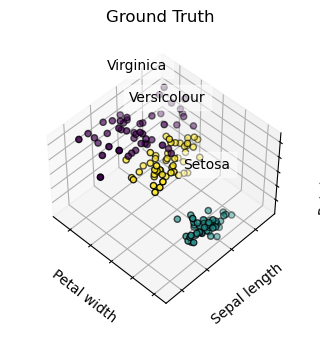

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
        edgecolor='k')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [34]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

X_train, X_test, y_train, y_test = train_test_split(X, y)
############################################

###  Visualization of MINIST

In [31]:
# Visualize MINIST
########### Write Your Code Here ###########

############################################

### Fit  Model

In [35]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
############################################

LinearDiscriminantAnalysis()

## Evaluate model

In [36]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score

pred = lda.predict(X_test)
accuracy_score(y_test, pred)
############################################

0.8675428571428572

### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?